In [1]:
import numpy as np  
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, hidden layer
model.add(Dense(units=400, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=200, activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 進行 one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
x_Train_norm.min(), x_Train_norm.max()

(0.0, 1.0)

In [3]:
# 進行訓練
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=200, 
                          verbose=2)  


Epoch 1/50
240/240 - 2s - loss: 0.3422 - accuracy: 0.9064 - val_loss: 0.1601 - val_accuracy: 0.9547
Epoch 2/50
240/240 - 2s - loss: 0.1236 - accuracy: 0.9638 - val_loss: 0.1116 - val_accuracy: 0.9668
Epoch 3/50
240/240 - 2s - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.0875 - val_accuracy: 0.9728
Epoch 4/50
240/240 - 2s - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0931 - val_accuracy: 0.9725
Epoch 5/50
240/240 - 2s - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0876 - val_accuracy: 0.9736
Epoch 6/50
240/240 - 2s - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 7/50
240/240 - 2s - loss: 0.0202 - accuracy: 0.9941 - val_loss: 0.0860 - val_accuracy: 0.9768
Epoch 8/50
240/240 - 2s - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.1066 - val_accuracy: 0.9708
Epoch 9/50
240/240 - 2s - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0961 - val_accuracy: 0.9754
Epoch 10/50
240/240 - 2s - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0942 - val_accuracy: 0.9769

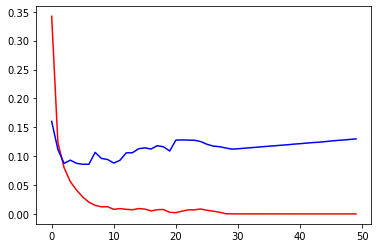

In [4]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

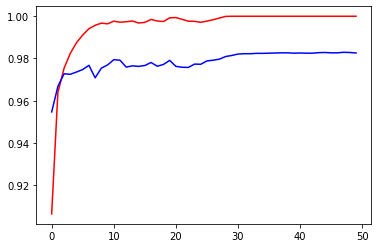

In [5]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

In [6]:
# 訓練成果(分數) 99.7%
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


1875/1875 [==============================] - 5s 2ms/step - loss: 0.0260 - accuracy: 0.9965

	[Info] Accuracy of training data = 99.7%


In [20]:
x_Test_norm.shape
# 10000個 784 pix

(10000, 784)

In [8]:
# 訓練成果(分數) 98.5%
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9846

	[Info] Accuracy of testing data = 98.5%


In [ ]:
# 以上模型建立完畢

In [ ]:
# 以下開始手寫辨識

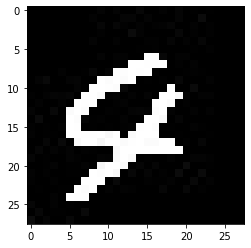

In [29]:
import matplotlib.pyplot as plt
from skimage import color

test = color.rgb2gray(plt.imread('4.jpg'))
plt.imshow(test, cmap='gray')
plt.show()


In [30]:
test.shape

(28, 28)

In [31]:
import numpy as np
np.argmax(model.predict(test.reshape(1, 784)), axis=1)

array([9], dtype=int64)